In [122]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [123]:
from sklearn import metrics
from sklearn import datasets
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [124]:
# Iris dataset is one of the built in datasets of sklearn library, and we are using that here.
iris_df = pd.read_csv('datasets/iris/iris.data', skiprows=1,
                     names= ['sepal-length',
                            'sepal-width',
                            'petal-length',
                            'petal-width',
                            'class'])

iris_df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [125]:
# let's randomize the data
iris_df = iris_df.sample(frac=1).reset_index(drop=True)

iris_df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,7.2,3.0,5.8,1.6,Iris-virginica
1,5.9,3.2,4.8,1.8,Iris-versicolor
2,7.9,3.8,6.4,2.0,Iris-virginica
3,5.0,3.4,1.5,0.2,Iris-setosa
4,6.9,3.2,5.7,2.3,Iris-virginica


In [126]:
iris_df.shape

(149, 5)

In [127]:
iris_df['class'].unique()

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [128]:
from sklearn import preprocessing

label_encoding = preprocessing.LabelEncoder()

iris_df['class'] = label_encoding.fit_transform(iris_df['class']).astype(str)

iris_df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,7.2,3.0,5.8,1.6,2
1,5.9,3.2,4.8,1.8,1
2,7.9,3.8,6.4,2.0,2
3,5.0,3.4,1.5,0.2,0
4,6.9,3.2,5.7,2.3,2


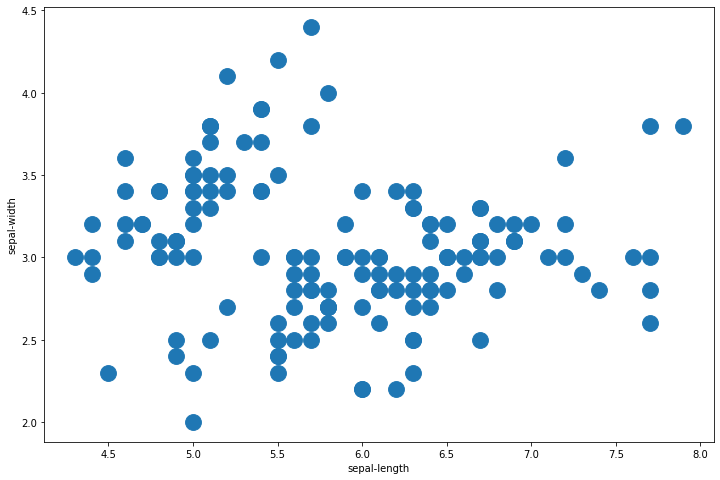

In [129]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(iris_df['sepal-length'], iris_df['sepal-width'], s=250)

plt.xlabel('sepal-length')
plt.ylabel('sepal-width')

plt.show()

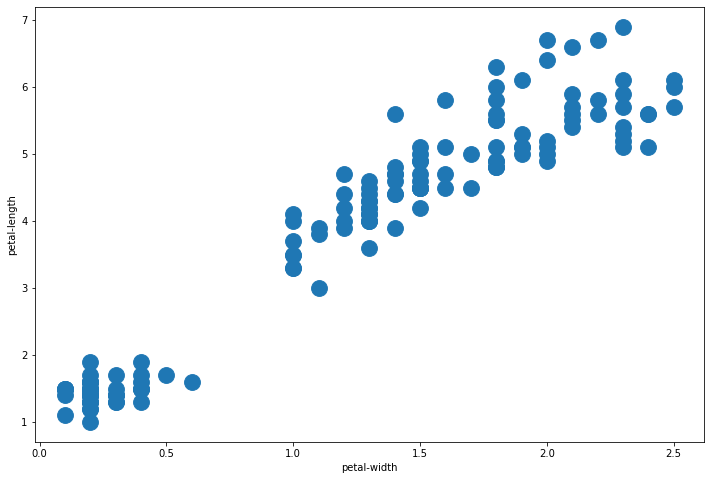

In [130]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(iris_df['petal-width'], iris_df['petal-length'], s=250)

plt.xlabel('petal-width')
plt.ylabel('petal-length')

plt.show()

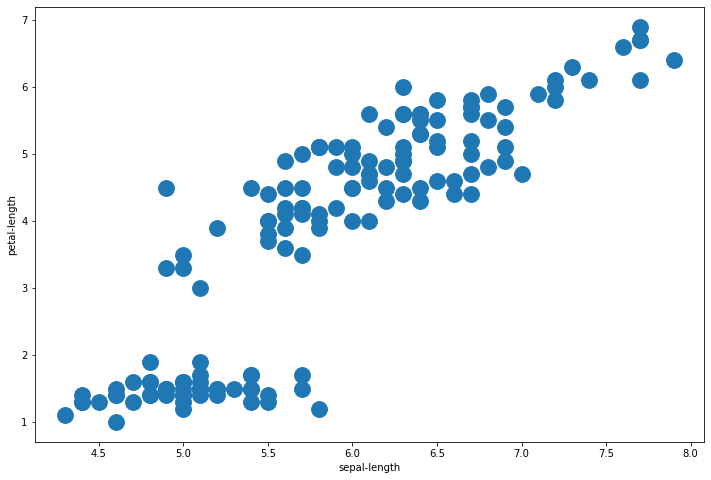

In [131]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(iris_df['sepal-length'], iris_df['petal-length'], s=250)

plt.xlabel('sepal-length')
plt.ylabel('petal-length')

plt.show()

In [132]:
# in the above graph, you can see some clusters forming. You can identify about 3 here

iris_2D = iris_df[['sepal-length', 'petal-length']]

iris_2D.sample(5)

# First here, we are considering 2 features to perform clustering, then we can proceed to include the rest

,sepal-length,petal-length
46,5.0,1.6
48,4.6,1.4
92,4.8,1.9
111,5.5,1.3
66,5.4,4.5


In [133]:
iris_2D.shape

(149, 2)

In [134]:
# Now before applying the KMeans estimator on this data, we are converting it to a numpy array. Why?

iris_2D = np.array(iris_2D)

iris_2D.shape

(149, 2)

In [135]:
kmeans_model_2D = KMeans(n_clusters=3, max_iter=1000).fit(iris_2D)

# In the real world datasets, you may not know the number of clusters initially, that's when you'll use
# techniques like Hyper-parameter tuning

In [136]:
kmeans_model_2D.labels_

array([0, 2, 0, 1, 0, 2, 0, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 0, 0, 1, 2, 2,
       1, 2, 2, 2, 1, 2, 0, 0, 1, 1, 2, 0, 2, 1, 0, 1, 1, 2, 2, 0, 2, 2,
       0, 0, 1, 1, 1, 1, 2, 2, 0, 2, 2, 1, 2, 0, 0, 0, 1, 0, 2, 1, 1, 2,
       2, 2, 1, 0, 1, 1, 2, 2, 2, 1, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 2, 1,
       2, 2, 0, 2, 1, 2, 1, 1, 2, 1, 1, 0, 0, 1, 0, 2, 0, 2, 2, 1, 1, 0,
       0, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 1, 0, 1, 0, 2, 1, 1,
       2, 1, 1, 0, 1, 2, 0, 2, 2, 1, 1, 2, 2, 2, 2, 0, 0], dtype=int32)

In [137]:
# The labels assigned by K-means may not match the actual labels in our data - these labels just represent clusters

centroids_2D = kmeans_model_2D.cluster_centers_

centroids_2D

array([[6.83902439, 5.67804878],
       [5.006     , 1.496     ],
       [5.87413793, 4.39310345]])

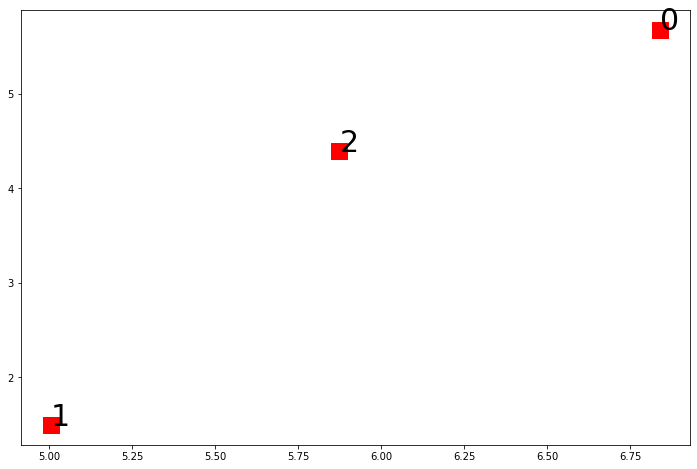

In [138]:
# The above are coordinates of the cluster centers

fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(centroids_2D[:,0], centroids_2D[:,1], c='r', s=250, marker='s')


for i in range(len(centroids_2D)):
    plt.annotate(i, (centroids_2D[i][0], centroids_2D[i][1]), fontsize=30)

In [139]:
iris_labels = iris_df['class']

In [140]:
iris_labels.head()

0    2
1    1
2    2
3    0
4    2
Name: class, dtype: object

In [170]:
print('Homogeneity_score: ', metrics.homogeneity_score(iris_labels, kmeans_model_2D.labels_))

print('Completeness_score: ', metrics.completeness_score(iris_labels, kmeans_model_2D.labels_))

print('v_measure_score: ', metrics.v_measure_score(iris_labels, kmeans_model_2D.labels_))

print('Adjusted_rand_score: ', metrics.adjusted_rand_score(iris_labels, kmeans_model_2D.labels_))

print('Adjusted_mutual_info_score: ', metrics.adjusted_mutual_info_score(iris_labels, kmeans_model_2D.labels_))

print('Silhouette_score: ', metrics.silhouette_score(iris_2D, kmeans_model_2D.labels_))

Homogeneity_score:  0.7014365278306043
Completeness_score:  0.7077571624221454
v_measure_score:  0.7045826702042487
Adjusted_rand_score:  0.6949972011546609
Adjusted_mutual_info_score:  0.7008411611629515
Silhouette_score:  0.5867739291153844


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0      2
1      1
2      2
3      0
4      2
      ..
144    1
145    1
146    2
147    2
148    2
Name: class, Length: 149, dtype: object

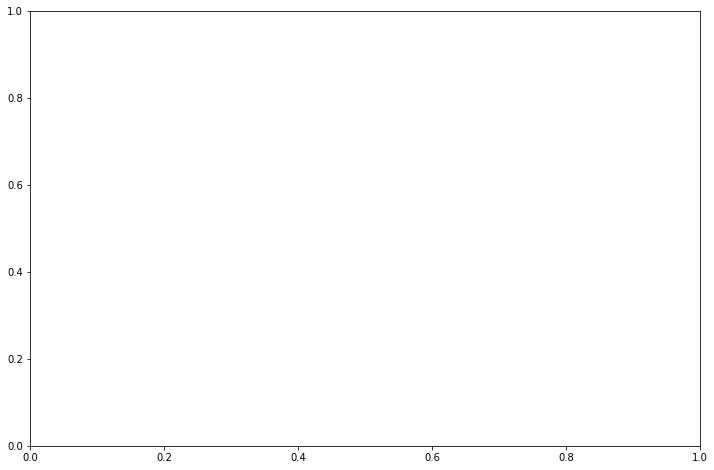

In [178]:
colors = ['yellow', 'blue', 'green']

plt.figure(figsize=(12,8))

plt.scatter(iris_df['sepal-length'], iris_df['petal-length'], c=iris_labels, s=200, 
            cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)

plt.scatter(centroids_2D[:,0], centroids_2D[:,1], c='r', s=250, marker='s')

for i in range(len(centroids_2D)):
    plt.annotate(i, (centroids_2D[i][0], centroids_2D[i][1]), fontsize=30)

In [115]:
iris_df['class'].head()

0    1
1    2
2    0
3    0
4    2
Name: class, dtype: object

In [152]:
iris_df['class'].shape

(149,)

In [163]:
iris_labels.head()

0    2
1    1
2    2
3    0
4    2
Name: class, dtype: object

In [169]:
kmeans_model_2D.labels_

array([0, 2, 0, 1, 0, 2, 0, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 0, 0, 1, 2, 2,
       1, 2, 2, 2, 1, 2, 0, 0, 1, 1, 2, 0, 2, 1, 0, 1, 1, 2, 2, 0, 2, 2,
       0, 0, 1, 1, 1, 1, 2, 2, 0, 2, 2, 1, 2, 0, 0, 0, 1, 0, 2, 1, 1, 2,
       2, 2, 1, 0, 1, 1, 2, 2, 2, 1, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 2, 1,
       2, 2, 0, 2, 1, 2, 1, 1, 2, 1, 1, 0, 0, 1, 0, 2, 0, 2, 2, 1, 1, 0,
       0, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 1, 0, 1, 0, 2, 1, 1,
       2, 1, 1, 0, 1, 2, 0, 2, 2, 1, 1, 2, 2, 2, 2, 0, 0], dtype=int32)

In [172]:
iris_features = iris_df.drop('class', axis=1)

iris_features.head()

,sepal-length,sepal-width,petal-length,petal-width
0,7.2,3.0,5.8,1.6
1,5.9,3.2,4.8,1.8
2,7.9,3.8,6.4,2.0
3,5.0,3.4,1.5,0.2
4,6.9,3.2,5.7,2.3


In [173]:
iris_labels = iris_df['class']

iris_labels.sample(5)

35     0
12     0
132    1
46     0
123    2
Name: class, dtype: object

In [174]:
kmeans_model = KMeans(n_clusters=3).fit(iris_features)

In [175]:
kmeans_model.labels_

array([2, 1, 2, 0, 2, 1, 2, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 2, 2, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 2, 2, 1, 0, 1, 2, 1, 0, 2, 0, 0, 1, 1, 2, 1, 1,
       2, 1, 0, 0, 0, 0, 1, 1, 2, 1, 1, 0, 1, 2, 2, 2, 0, 2, 1, 0, 0, 1,
       1, 1, 0, 2, 0, 0, 1, 1, 1, 0, 1, 2, 1, 2, 2, 2, 0, 2, 0, 2, 1, 0,
       1, 1, 2, 1, 0, 1, 0, 0, 1, 0, 0, 2, 2, 0, 2, 1, 2, 1, 1, 0, 0, 2,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 0, 2, 0, 2, 1, 0, 0,
       1, 0, 0, 2, 0, 1, 2, 1, 1, 0, 0, 1, 1, 1, 1, 2, 2], dtype=int32)

In [176]:
kmeans_model.cluster_centers_

array([[5.00408163, 3.41632653, 1.46530612, 0.24489796],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [177]:
print('Homogeneity_score: ', metrics.homogeneity_score(iris_labels, kmeans_model.labels_))

print('Completeness_score: ', metrics.completeness_score(iris_labels, kmeans_model.labels_))

print('v_measure_score: ', metrics.v_measure_score(iris_labels, kmeans_model.labels_))

print('Adjusted_rand_score: ', metrics.adjusted_rand_score(iris_labels, kmeans_model.labels_))

print('Adjusted_mutual_info_score: ', metrics.adjusted_mutual_info_score(iris_labels, kmeans_model.labels_))

print('Silhouette_score: ', metrics.silhouette_score(iris_features, kmeans_model.labels_))

Homogeneity_score:  0.749807237927981
Completeness_score:  0.7633704476901694
v_measure_score:  0.7565280566037267
Adjusted_rand_score:  0.7266293901799755
Adjusted_mutual_info_score:  0.753429077568901
Silhouette_score:  0.5501981391949841
